## Linear Regression with NumPy 
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/rmenegaux/Intro-to-Neural-Nets-AIMS-2025/blob/main/lecture1_linear_regression_numpy.ipynb)


### Part 1: Gradients
----

$\langle \cdot, \cdot \rangle$ is the standard euclidean inner product $\langle x , y \rangle = x^T y$

Let $x \in \mathbb{R}^n$ with $n\in \mathbb{N}$.

Let $f: \mathbb{R}^n \rightarrow \mathbb{R}$ be a differentiable function.

The **gradient** $\nabla f: \mathbb{R}^n \rightarrow \mathbb{R}^n$ can be defined either by its components $$[\nabla f(x)]_i = \frac{\partial f}{\partial x_i}(x),$$
or as the unique vector $\in \mathbb{R}^n$ such that for small $h \in \mathbb{R}^n$,
$$f(x+h) \underset{\lVert h \rVert \to 0}{=} f(x) + \langle\nabla f(x), h\rangle + o(h).$$
In each of the questions, find $\nabla f$, using either one (or both) of the above definitions.

1. $f(x) = w x + b \quad w, b \in \mathbb{R}$, $f: \, \mathbb{R} \to \mathbb{R}$

2. $f(x) = w^T x + b \quad w \in \mathbb{R}^n, b \in \mathbb{R}$

4. $\sigma(x) =\frac 1 {1+e^{-x}}$ is the *sigmoid* function, compute its derivative $\sigma'$, and express the result only with $\sigma$, no exponentials.

2. (a) $f(x)=\sigma(w^Tx + b), \quad \sigma : \mathbb{R} \rightarrow \mathbb{R}$ a differentiable function, $b\in \mathbb{R}$

    (b) Simplify (a) when $\sigma$ is one of these activation functions: $\sigma(x) = max(x, 0)$, $\sigma(x) =\frac 1 {1+e^{-x}}$




In [ ]:
# Choose a student for the board
import numpy as np
def choose_student():
    row = int(np.random.rand() * 7) + 1
    column = int(np.random.rand() * 10) + 1
    return row, column

print(choose_student())

### Part 2: Linear Regression
---

## Linear Regression

Linear regression is a fundamental supervised learning algorithm used for predicting continuous values. Given an input feature vector **x**, the model computes:

$$
\hat{y} = w^T x + b
$$

where **w** is the weight vector and **b** is the bias term.

### Loss Function

To measure the error between predicted values **$\hat{y}$** and true values **$y$**, we use the **Mean Squared Error (MSE)** loss:

$$
L = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2
$$

where **N** is the number of training samples.

### Optimization: Gradient Descent

To minimize the loss, we update **w** and **b** using **gradient descent**. The gradients of the loss with respect to **w** and **b** are:

$$
\frac{\partial L}{\partial w} = -\frac{2}{N} \sum_{i=1}^{N} x_i (y_i - \hat{y}_i)
$$

$$
\frac{\partial L}{\partial b} = -\frac{2}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)
$$

We update **w** and **b** iteratively, by **gradient descent**:

$$
w \leftarrow w - \alpha \frac{\partial L}{\partial w}
$$

$$
b \leftarrow b - \alpha \frac{\partial L}{\partial b}
$$

where **$\alpha$** is the learning rate.

Linear regression models a straight-line relationship between the input and output, is fast to compute, and in many practical scenarios a strong baseline model.


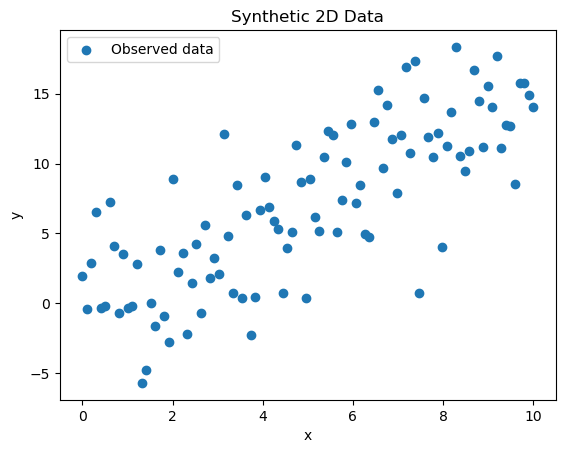

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
x = np.linspace(0, 10, 100)
y = 1.5 * x + 2 * np.random.normal(0, 2, size=x.shape)

# Plot data
plt.scatter(x, y, label='Observed data')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Synthetic 2D Data")
plt.legend()
plt.show()

In [5]:
# Complete the following functions:
def mse_loss(y_hat, y):
    '''
    Computes the Mean Squared Error (MSE) loss.

    Arguments:
    y_hat -- Predicted values, shape (N,)
    y -- True values, shape (N,)

    Returns:
    Mean squared error loss (scalar)
    '''
    return np.mean((y_hat - y)**2)


def compute_ols_gradients(x, y, w, b):
    '''
    Computes the gradients of the Ordinary Least Squares (OLS) loss 
    with respect to the weight `w` and bias `b` in simple linear regression.

    Arguments:
    x -- Input features, shape (N,) (single feature per sample)
    y -- True target values, shape (N,)
    w -- Weight parameter (scalar)
    b -- Bias term (scalar)

    Returns:
    grad_w -- Gradient of the MSE loss with respect to `w` (scalar)
    grad_b -- Gradient of the MSE loss with respect to `b` (scalar)
    '''
    y_hat = w * x + b  # Predicted values
    grad_w = 2 * np.mean((y_hat-y)*x)  # Partial derivative w.r.t. w
    grad_b = 2 * np.mean(y_hat-y)  # Partial derivative w.r.t. b
    return grad_w, grad_b


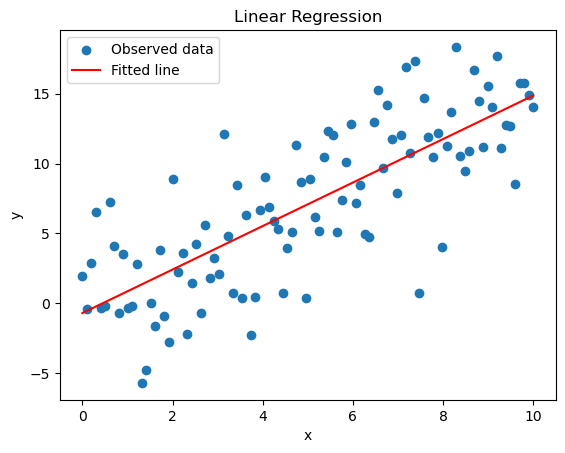

In [6]:
# Train using gradient descent
# Initialize with random weights
w, b = np.random.randn(), np.random.randn()
learning_rate = 0.01
num_epochs = 1000

for _ in range(num_epochs):
    grad_w, grad_b = compute_ols_gradients(x, y, w, b)
    # fill in the update functions 
    w = w - learning_rate * grad_w
    b = b - learning_rate * grad_b

# Plot fitted line
y_hat = w * x + b
plt.scatter(x, y, label='Observed data')
plt.plot(x, y_hat, color='red', label='Fitted line')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression")
plt.legend()
plt.show()
